*This tutorial is part of the series [Learning Machine Learning](kaggle.com/learn/machine-learning).*

# Choosing the Prediction Target

You have the code to load your data, and you know how to index it. You are ready to choose which column you want to predict. This column is called the **prediction target**. There is a convention that the prediction target is referred to as **y**. Here is an example doing that with the example data.

In [16]:
# This code loads the data. You have seen it before, so you don't need to focus on it here.

import pandas as pd

melbourne_file_path = '../Data/raw/melbourne-housing-snapshot/melb_data.csv'
melbourne_data = pd.read_csv(melbourne_file_path)

# The Melbourne data has somemissing values (some houses for which some variables weren't recorded.)
# We'll learn to handle missing values in a later tutorial.  
# Your Iowa data doesn't have missing values in the predictors you use. 
# So we will take the simplest option for now, and drop those houses from our data. 
#Don't worry about this much for now, though the code is:

# dropna drops missing values (think of na as "not available")
# dropna the whole line if any NA in row.
melbourne_data = melbourne_data.dropna(axis=0)

In [17]:
X_columns = ['Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 
                 'YearBuilt', 'Lattitude', 'Longtitude']
y_columns = ['Price']

X_y_columns = X_columns + y_columns

print(melbourne_data[X_y_columns].head(5))

   Rooms  Bathroom  Landsize  BuildingArea  YearBuilt  Lattitude  Longtitude  \
1      2       1.0     156.0          79.0     1900.0   -37.8079    144.9934   
2      3       2.0     134.0         150.0     1900.0   -37.8093    144.9944   
4      4       1.0     120.0         142.0     2014.0   -37.8072    144.9941   
6      3       2.0     245.0         210.0     1910.0   -37.8024    144.9993   
7      2       1.0     256.0         107.0     1890.0   -37.8060    144.9954   

       Price  
1  1035000.0  
2  1465000.0  
4  1600000.0  
6  1876000.0  
7  1636000.0  


In [18]:
y = melbourne_data.Price

## Clustering and Visualization

In [43]:
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
# scaler = MinMaxScaler(feature_range=(1,100))

In [44]:
melbourne_data[X_columns].head(5)

,Rooms,Bathroom,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude
1,2,1.0,156.0,79.0,1900.0,-37.8079,144.9934
2,3,2.0,134.0,150.0,1900.0,-37.8093,144.9944
4,4,1.0,120.0,142.0,2014.0,-37.8072,144.9941
6,3,2.0,245.0,210.0,1910.0,-37.8024,144.9993
7,2,1.0,256.0,107.0,1890.0,-37.8060,144.9954


In [45]:
X_scaled = scaler.fit_transform(melbourne_data[X_columns])
X_scaled = pd.DataFrame(X_scaled, columns=X_columns)
X_scaled.head()

,Rooms,Bathroom,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude
0,-0.959224,-0.810257,-0.351031,-0.688873,-1.681827,0.000055,0.032261
1,0.070641,0.595611,-0.375546,0.092828,-1.681827,-0.018404,0.042346
2,1.100507,-0.810257,-0.391147,0.004749,1.310095,0.009284,0.039320
3,0.070641,0.595611,-0.251853,0.753421,-1.419378,0.072572,0.091763
4,-0.959224,-0.810257,-0.239595,-0.380597,-1.944277,0.025106,0.052431


In [50]:
from sklearn.cluster import KMeans

num_cluster = 3
model = KMeans(num_cluster)
model.fit(X_scaled)
clust_labels = model.predict(X_scaled)
cent = model.cluster_centers_

kmeans = pd.DataFrame(clust_labels)
cent = pd.DataFrame(cent, columns=X_columns)
display(kmeans.head())
display(cent)

,0
0,1
1,1
2,2
3,0
4,1


,Rooms,Bathroom,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude
0,0.961592,1.044695,0.123325,0.904437,0.007487,-0.569986,0.732851
1,-0.728241,-0.687577,-0.186471,-0.540142,-0.283907,-0.169033,0.110270
2,0.209827,0.078924,0.160804,-0.010969,0.401897,0.739771,-0.797135


In [51]:
X_columns_num = melbourne_data[X_columns].shape[1]
X_columns_num

7

In [52]:
X_scaled_with_label = X_scaled[:]
X_scaled_with_label.insert(X_columns_num, 'kmeans', kmeans)
display(X_scaled_with_label.head())
X_scaled_with_label.head().values

,Rooms,Bathroom,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,kmeans
0,-0.959224,-0.810257,-0.351031,-0.688873,-1.681827,0.000055,0.032261,1
1,0.070641,0.595611,-0.375546,0.092828,-1.681827,-0.018404,0.042346,1
2,1.100507,-0.810257,-0.391147,0.004749,1.310095,0.009284,0.039320,2
3,0.070641,0.595611,-0.251853,0.753421,-1.419378,0.072572,0.091763,0
4,-0.959224,-0.810257,-0.239595,-0.380597,-1.944277,0.025106,0.052431,1


array([[-9.59224447e-01, -8.10257196e-01, -3.51030592e-01,
        -6.88873405e-01, -1.68182726e+00,  5.50505937e-05,
         3.22607029e-02,  1.00000000e+00],
       [ 7.06412043e-02,  5.95610512e-01, -3.75546475e-01,
         9.28282302e-02, -1.68182726e+00, -1.84038157e-02,
         4.23457535e-02,  1.00000000e+00],
       [ 1.10050686e+00, -8.10257196e-01, -3.91147491e-01,
         4.74917274e-03,  1.31009469e+00,  9.28448372e-03,
         3.93202383e-02,  2.00000000e+00],
       [ 7.06412043e-02,  5.95610512e-01, -2.51852705e-01,
         7.53421161e-01, -1.41937796e+00,  7.25720251e-02,
         9.17625012e-02,  0.00000000e+00],
       [-9.59224447e-01, -8.10257196e-01, -2.39594764e-01,
        -3.80596704e-01, -1.94427655e+00,  2.51063691e-02,
         5.24308040e-02,  1.00000000e+00]])

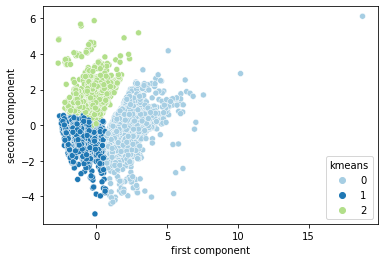

In [53]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca.fit(X_scaled_with_label.values)
x_pca = pca.transform(X_scaled_with_label.values)
df_pca = pd.DataFrame(x_pca, columns=['first component', 'second component'])
df_pca['kmeans'] = X_scaled_with_label['kmeans']
sns.scatterplot(x="first component", y="second component", hue="kmeans", data=df_pca, palette="Paired")
plt.show()

## Generate ScatterPolar Html

In [54]:
X_scaled_with_label[X_columns].to_excel('../Data/external/out_put_excel/hh_scaled_grouped.xlsx')
X_scaled_with_label[X_columns].describe()


,Rooms,Bathroom,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude
count,6.196000e+03,6.196000e+03,6.196000e+03,6.196000e+03,6.196000e+03,6.196000e+03,6.196000e+03
mean,6.421949e-17,1.376132e-17,-2.293553e-17,4.587106e-17,-1.715578e-15,-5.655902e-14,3.882068e-14
std,1.000081e+00,1.000081e+00,1.000081e+00,1.000081e+00,1.000081e+00,1.000081e+00,1.000081e+00
min,-1.989090e+00,-8.102572e-01,-5.248705e-01,-1.558654e+00,-2.015826e+01,-4.707220e+00,-4.516400e+00
25%,-9.592244e-01,-8.102572e-01,-3.554880e-01,-5.567548e-01,-6.320301e-01,-6.267223e-01,-6.454799e-01
50%,7.064120e-02,-8.102572e-01,-1.092148e-01,-1.934287e-01,1.553178e-01,7.454976e-02,5.646482e-02
75%,1.100507e+00,5.956105e-01,1.749465e-01,3.130259e-01,9.426657e-01,6.553448e-01,6.303042e-01
max,5.219969e+00,9.030817e+00,4.070639e+01,3.270410e+01,1.415074e+00,4.625451e+00,5.407088e+00


In [55]:
X_scaled_with_label.groupby('kmeans').mean()

,Rooms,Bathroom,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude
kmeans,,,,,,,
0,0.960789,1.045247,0.123079,0.903933,0.007676,-0.571662,0.734678
1,-0.730026,-0.688235,-0.186491,-0.540573,-0.281530,-0.167310,0.108491
2,0.215406,0.081654,0.161563,-0.008082,0.398985,0.738806,-0.795981


In [56]:
import plotly.graph_objects as go

df = X_scaled_with_label.groupby('kmeans').mean()
key_features = X_columns
file_name = 'scatterpolar'

display(df)

fig = go.Figure()
for kmeans in df.index.unique():
    fig.add_trace(go.Scatterpolar(
        r=list(df[df.index==kmeans][key_features].values[0]),
        theta=key_features,
        fill='toself',
        name=str(kmeans)
    ))
    fig.update_layout(
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[-1, 2]
            )),
        showlegend=True
    )
fig.write_html('../Data/external/plotly/{}.html'.format(file_name), auto_open=True)

,Rooms,Bathroom,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude
kmeans,,,,,,,
0,0.960789,1.045247,0.123079,0.903933,0.007676,-0.571662,0.734678
1,-0.730026,-0.688235,-0.186491,-0.540573,-0.281530,-0.167310,0.108491
2,0.215406,0.081654,0.161563,-0.008082,0.398985,0.738806,-0.795981


# Choosing Predictors
Next we select the predictors. Sometimes, you will want to use all of the variables except the target..

It's possible to model with non-numeric variables, but we'll start with a narrower set of numeric variables.  In the example data, the predictors will be chosen as:

In [11]:
melbourne_predictors = ['Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 
                        'YearBuilt', 'Lattitude', 'Longtitude']

By convention, this data is called **X**.

In [12]:
X = melbourne_data[melbourne_predictors]

---
# Building Your Model

You will use the **scikit-learn** library to create your models.  When coding, this library is written as **sklearn**, as you will see in the sample code. Scikit-learn is easily the most popular library for modeling the types of data typically stored in DataFrames. 

The steps to building and using a model are:
* **Define:** What type of model will it be?  A decision tree?  Some other type of model? Some other parameters of the model type are specified too.
* **Fit:** Capture patterns from provided data. This is the heart of modeling.
* **Predict:** Just what it sounds like
* **Evaluate**: Determine how accurate the model's predictions are.

Here is the example for defining and fitting the model.

In [14]:
from sklearn.tree import DecisionTreeRegressor

# Define Model
melbourne_model = DecisionTreeRegressor()

# Fit Model
melbourne_model.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

The output describes some parameters about the type of model you've built. Don't worry about it for now.

In practice, you'll want to make predictions for new houses coming on the market rather than the houses we already have prices for. But we'll make predictions for the first rows of the training data to see how the predict function works.

In [15]:
print("Making predictions for the following 5 houses:")
print(X.head())
print("The predictions are")
print(melbourne_model.predict(X.head()))

Making predictions for the following 5 houses:
   Rooms  Bathroom  Landsize  BuildingArea  YearBuilt  Lattitude  Longtitude
1      2       1.0     156.0          79.0     1900.0   -37.8079    144.9934
2      3       2.0     134.0         150.0     1900.0   -37.8093    144.9944
4      4       1.0     120.0         142.0     2014.0   -37.8072    144.9941
6      3       2.0     245.0         210.0     1910.0   -37.8024    144.9993
7      2       1.0     256.0         107.0     1890.0   -37.8060    144.9954
The predictions are
[1035000. 1465000. 1600000. 1876000. 1636000.]


In [27]:
# To put the predict after each X vector
# Reset Index to 0, 1, .... 
# Join by Index

pd.concat([X.head().reset_index(drop=True),
          pd.Series(melbourne_model.predict(X.head()), name='Predict')], 
          axis=1)

,Rooms,Bathroom,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Predict
0,2,1.0,156.0,79.0,1900.0,-37.8079,144.9934,1035000.0
1,3,2.0,134.0,150.0,1900.0,-37.8093,144.9944,1465000.0
2,4,1.0,120.0,142.0,2014.0,-37.8072,144.9941,1600000.0
3,3,2.0,245.0,210.0,1910.0,-37.8024,144.9993,1876000.0
4,2,1.0,256.0,107.0,1890.0,-37.8060,144.9954,1636000.0


---

# Your Turn
Now it's time for you to define and fit a model for your data (in your notebook).
1. Select the target variable you want to predict. You can go back to the list of columns from your earlier commands to recall what it's called (*hint: you've already worked with this variable*). Save this to a new variable called `y`.
2. Create a **list** of the names of the predictors we will use in the initial model.  Use just the following columns in the list (you can copy and paste the whole list to save some typing, though you'll still need to add quotes):
    * LotArea
    * YearBuilt
    * 1stFlrSF
    * 2ndFlrSF
    * FullBath
    * BedroomAbvGr
    * TotRmsAbvGrd

3. Using the list of variable names you just created, select a new DataFrame of the predictors data. Save this with the variable name `X`.
4. Create a `DecisionTreeRegressorModel` and save it to a variable (with a name like my_model or iowa_model). Ensure you've done the relevant import so you can run this command.
5. Fit the model you have created using the data in `X` and the target data you saved above.
6. Make a few predictions with the model's `predict` command and print out the predictions.  


---

# Continue

You've built a decision tree model that can predict the prices of houses based on their characteristics.  It's natural to ask how accurate the model's predictions will be, and measuring accuracy is necessary for us to see whether or not other approaches improve our model. 

Move on to the [next page](https://www.kaggle.com/dansbecker/model-validation) to see how we measure model accuracy.
